# Projet numérique n°2

In [1]:
# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec
from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

# Mathématiques
import math

In [2]:
# Attribution des valeurs de facteurs
alpha = 2.0
beta = 1.0
gamma = 2.0
delta = 0.5

## Question 1

$\alpha$ peut être interprêté comme le facteur de croissance de la population de proies en l'abscence de prédateur.

$\beta$ peut être interprêté comme le facteur de perte lié à la présence de prédateurs, et il traduit le fait que plus il y a de proies disponibles (chasse facilitée) et de prédateurs à l'affût (plus de chasseurs), plus la population de proies diminue.

$\gamma$ peut être interprêté comme le facteur de décroissance de la population de prédateurs, qui se nourrissant de proies, dépérit en leur abscence.

Enfin, $\delta$ peut être interprêté comme - de manière inversée à $\beta$, le facteur d croissance de la population de prédateur lorsqu'il a des proies abondantes et et beaucoup de chasseurs pour les chasser et se reproduire.

Cherchons les points d'équilibres, c'est-à-dire les points pour lesquels on a simultanément $\dot x_{1} = 0$ et $\dot x_{2} = 0$. Cela revient donc à résoudre le système à deux inconnues suivant :
$ \left \{ \begin{aligned} x_{1}(\beta - \alpha x_{2})=0 \quad (1) \\  -x_{2}(\delta - \gamma x_{1})=0 \quad (2) \end{aligned} \right. $

Avec (1), on a soit $x_1 \neq 0$ et dans ce cas, on a nécessairement $x_2 = \dfrac{\alpha}{\beta}$, soit $x_1 = 0$.

Avec (2), on a soit $x_2 \neq 0$ et dans ce cas, on a nécessairement $x_1 = \dfrac{\gamma}{\delta}$, soit $x_2 = 0$.

Par conséquent, si $x_{1} \neq 0$ ou si $x_{2} \neq 0$ alors on a nécessairement $x_2 = \dfrac{\alpha}{\beta}$ et $x_1 = \dfrac{\gamma}{\delta}$.

Et, de même, l'unique autre solution correspond à $x_{1} = x_{2} = 0$.

Donc, les deux points d'équilibres sont $(0, 0)$ et $\left( \dfrac{\gamma}{\delta}, \dfrac{\alpha}{\beta} \right) \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

Etudions la stabilité de ces points d'équilibre.

Tout d'abord, on note $\tilde f$ la fonction de $\mathbb{R}^{2}$ dans $\mathbb{R}^{2}$ définie par :
$\tilde f \left(\begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix}\right) = \begin{bmatrix}x_{1}(\alpha - \beta x_{2}) \\ -x_{2}(\gamma - \delta x_{1}) \end{bmatrix}$.

La double équation différentielle de Lotka-Volterra se réécrit donc : $\dot X = \tilde f(X)$ où l'inconnue $X$ est une fonction de $\mathbb{R}$ dans $\mathbb{R}^{2}$.

Chacune des deux composantes de $\tilde f$ étant polynomiale en $x_1$ et $x_2$, $\tilde f$ est continûement différentiable.
On calcule sa matrice jacobienne en un point $(x_{1},x_{2})$ quelconque :

$J_{\tilde f}((x_{1},x_{2})) =  \begin{bmatrix} \alpha-\beta x_{2} \phantom{--} -\beta x_{1} \\ \delta x_{2} \phantom{--} \delta x_{1}-\gamma \end{bmatrix}$

En particulier, en $(0,0)$, on a : $J_{\tilde f}((0,0)) =  \begin{bmatrix} \alpha \phantom{--} 0 \\ 0 \phantom{-} -\gamma \end{bmatrix}$, une matrice diagnolisable de valeurs propres $\alpha >0$ et $-\gamma <0$.
Or, d'après un théorème de cours, la présence d'une valeur propre ayant une partie réelle strictement positive implique que le point d'équilibre $(0, 0)$ est instable. 

Identiquement, en $\left( \dfrac{\gamma}{\delta}, \dfrac{\alpha}{\beta} \right)$, on a : $J_{\tilde f}\left( \left(\dfrac{\gamma}{\delta}, \dfrac{\alpha}{\beta} \right) \right) =  \begin{bmatrix} \alpha - \beta \dfrac{\alpha}{\beta} \phantom{--} -\beta \dfrac{\gamma}{\delta}  \\ \delta \dfrac{\alpha}{\beta} \phantom{--} \delta \dfrac{\gamma}{\delta}-\gamma  \end{bmatrix} = \begin{bmatrix} 0 \phantom{--} -\beta \dfrac{\gamma}{\delta}  \\ \delta \dfrac{\alpha}{\beta} \phantom{--} 0  \end{bmatrix}$.

Son polynôme caractéristique est $\chi(X) = X^2 + \beta \dfrac{\gamma}{\delta} \times  \delta \dfrac{\alpha}{\beta} = X^2 + \gamma \alpha$. En particulier, ce polynôme du second degré admet comme racines les complexes conjugués $\mp i\sqrt{\gamma \alpha}$ ayant une partie réelle nulle.
On en déduit que l'on ne peut conclure quant à la stabilité du point d'équilibre $\left(\dfrac{\gamma}{\delta}, \dfrac{\alpha}{\beta}\right)$.

### 
## Question 2

In [3]:
def f(x1,x2):
    x1_prime = alpha*x1-beta*x1*x2
    x2_prime = -gamma*x2+delta*x1*x2
    return [x1_prime,x2_prime]

In [4]:
PROIE = np.linspace(0,10,5)
PRED = np.linspace(0,5,5)
X,Y=np.meshgrid(PROIE,PRED)
Z = f(X,Y)

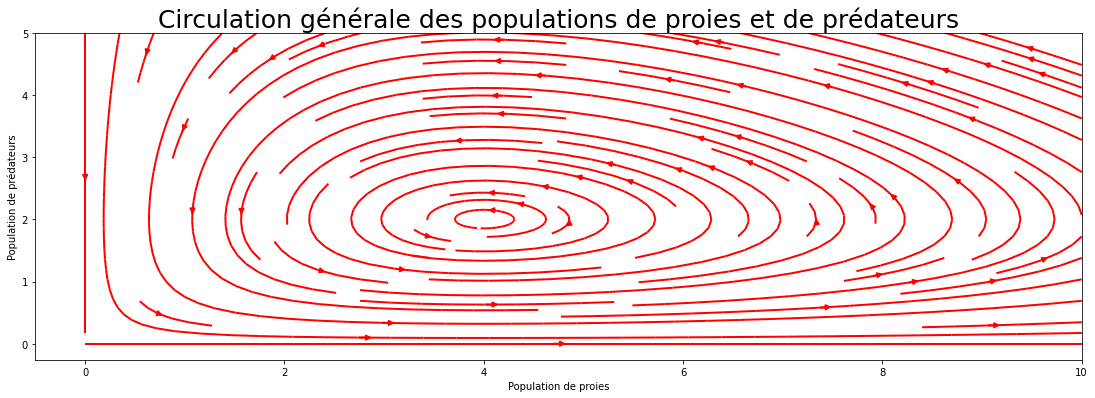

In [5]:
fig = plt.figure(figsize =(30, 20)) 
gs = matplotlib.gridspec.GridSpec(nrows = 3, ncols = 2, 
                       height_ratios =[1, 1, 2]) 
  

ax = fig.add_subplot(gs[0, 1]) 
strm = ax.streamplot(X, Y, Z[0], Z[1], color =0*Z[0], 
                     linewidth = 2, cmap ='autumn') 
ax.set_title('Circulation générale des populations de proies et de prédateurs',size=25) 
  
plt.xlabel("Population de proies")
plt.ylabel("Population de prédateurs")
plt.tight_layout() 
plt.show()

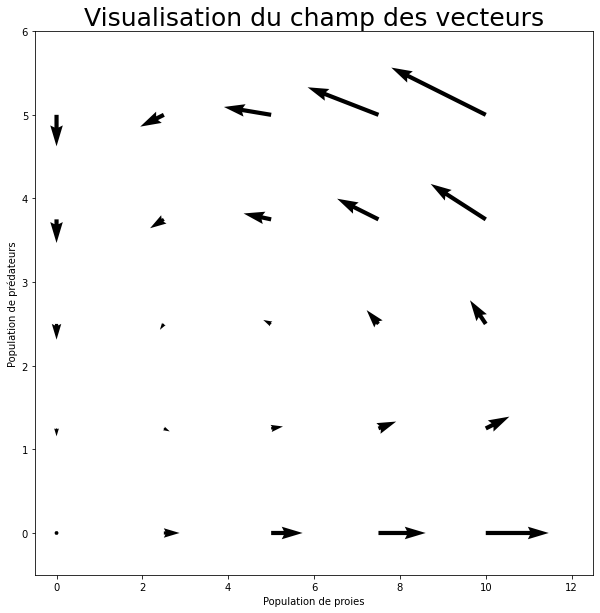

In [6]:
plt.quiver(X,Y,Z[0],Z[1])
plt.ylim(-0.5,6)
plt.xlim(-0.5,12.5)
plt.title("Visualisation du champ des vecteurs",size=25)
plt.xlabel("Population de proies")
plt.ylabel("Population de prédateurs")
plt.show()

On se doute ainsi que si on part d'un point sur le graphe, la solution de l'équation différentielle correspondante va suivre les lignes du champ de vecteurs et donc tourner autour du deuxième point d'équilibre que l'on a déterminé précédement.

## 
## Question 3

On note dans cette question-ci, $f$ la fonction de $\mathbb{R} \times \mathbb{R}^2$ dans $\mathbb{R}^2$ définie par :
$f \left(t,\begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix}\right) = \begin{bmatrix}x_{1}(\alpha - \beta x_{2}) \\ -x_{2}(\gamma - \delta x_{1}) \end{bmatrix}$.

$f$ est immédiatement continue (car polynomiale) et $f$ est continûment différentiable par rapport à $X$ comme montré avec la fonction $\tilde f$ de la question 1.

D'après le théorème de Cauchy-Lipschitz, pour tout couple $\left( t_{0},X_{0} \right)$, il existe une unique solution $X : t \longmapsto X(t)$ maximale de l'équation différentielle vérifiant la condition initiale $\left( t_{0},X_{0} \right)$.


Considérons une solution $X$ de l'équation différentielle de Lotka-Volterra initialisée dans $\left( t_{0},X_{0} \right) \in \mathbb{R} \times \mathbb{R}_{>0}^2$. 

On suppose par l'absurde qu'il existe un réel $t_{1}$ tel que $X(t_{1})\notin \mathbb{R}_{>0}^2$.Dans ce cas, on a soit $x_1(t_1)\leqslant 0$, soit $x_2(t_1)\leqslant 0$.


Cas 1 : $x_1(t_1)\leqslant 0$. 

Par continuité de $x_1$, il existe un réel $t_2$ vérifiant $x_1(t_2)= 0$. 
On vérifie alors aisément que $\tilde X$ définie ci-dessous est également solution :

$\tilde X : t\in \mathbb{R} \longmapsto \tilde X (t) = \begin{bmatrix} 0 \\ x_{2}(t_2) \, \mathrm{e}^{-\alpha (t-t_2)} \end{bmatrix}$

Cette solution étant maximale (puisque définie sur $\mathbb{R}$), on a par unicité de Cauchy-Lipschitz que $X=\tilde X$. On aurait alors en $t=t_0$, $0=x_1(t_0)>0$, ce qui est absurde.

Par suite, on a nécessairement  $x_2(t_1)\leqslant 0$



Cas 2 : $x_2(t_1)\leqslant 0$. 

De manière analogue, on obtient une absurdité.

En conclusion, on a donc montré à l'aide du théorème de Cauchy-Lipschitz que toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son ensemble de définition.

## 
## Question 4

Avec la question précédente, on sait que $H$ est bien définie le long des solutions initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ puisque celles-ci restent dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur leur ensemble de définition.

Soit $X(t) = \begin{bmatrix} x_1(t) \\ x_{2}(t) \end{bmatrix}$ une solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. On note $D$ son ensemble de définition.

H étant dérivable sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ comme combinaison linéaire et composition de fonctions dérivables et définies sur $\mathbb{R}_+^*$, on en déduit que $H$ est également dérivable le long de $X$.

Soit $t \in D$. On a alors :

$H'(X(t))= \delta \dot x_1 (t) - \gamma \dfrac{\dot x_1 (t)}{x_1(t)} + \beta \dot x_2 (t) - \alpha \dfrac{\dot x_2 (t)}{x_2(t)} $

Or, $X$ étant solution des équations de Lotka-Volterra, il vient :

$H'(X(t)) = \delta x_1(t) \, (\alpha - \beta x_2(t)) -\gamma \, (\alpha -\beta x_2(t) + \beta (-x_2(t) \, (\gamma - \delta x_1(t)) + \alpha \, (\gamma -\delta x_1(t)) = 0$. 

La dérivée de $H$ est donc nulle le long des solutions initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$.


On en déduit que $H$ est constant le long des solutions initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

On considère une telle solution et on suppose par l'absurde que $X$ est définie sur un domaine de définition $D$ strictement inclu dans $\mathbb{R}$.

Etudions d'abord le cas où $D$ admet une borne supérieure $s$ finie.

On sait alors par résultat de cours que $\lim_{t \to s} ||X(t)|| = +\infty $.

Par conséquent, puisque les composantes sont strictement positives, on a soit $\lim_{t \to s} x_1(t) = +\infty $, soit $\lim_{t \to s} x_2(t) = +\infty $.

Dans le premier cas, $H$ étant constant, on a nécessairement $\lim_{t \to s} \beta x_2(t) -\alpha \ln(x_2(t)) = -\infty $. Par suite, puisque $x_2$ est strictement positive, $\lim_{t \to s} \alpha \ln(x_2(t)) = +\infty $ et donc $\lim_{t \to s} x_2(t) = +\infty $. Or, on aurait alors $\lim_{t \to s} \beta x_2(t) -\alpha \ln(x_2(t)) = +\infty $, ce qui est absurde.

Dans le second cas, on obtient de manière analogue une absurdité, ce qui nous permet de conclure que $D$ n'a pas de borne supérieure finie.

Identiquement, on montre que $D$ n'a pas de borne inférieure finie, et cela nous permet d'en déduire que $D=\mathbb{R}$.

En conclusion, on a donc bien montré que toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ était définie sur $\mathbb{R}$ tout entier.

## 
## Question 5

On réutilise les outils du premier TP numérique pour tracer les coubres de niveaux de $H$.

In [7]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [8]:
def H(x1,x2):
    return delta*x1-gamma*np.log(x1)+beta*x2-alpha*np.log(x2)

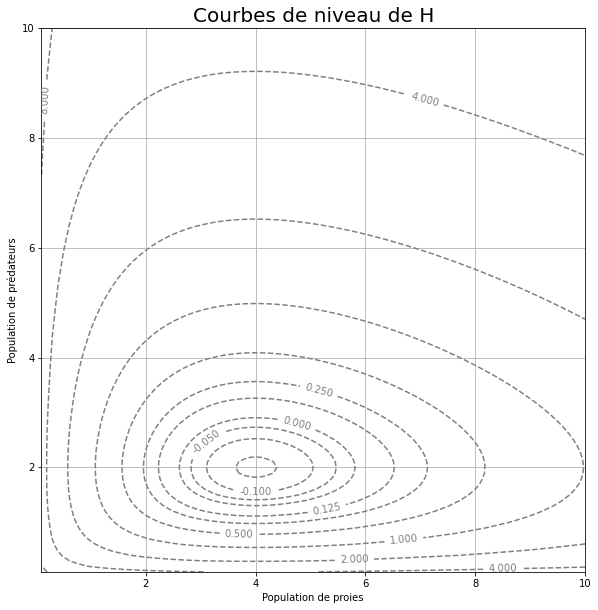

In [9]:
display_contour(
    H, 
    x=np.linspace(0.1, 10.0, 100), 
    y=np.linspace(0.1, 10.0, 100), 
    levels=[-0.15,-0.1,-0.05,0.0]+[2**i for i in range(-3,5)]
)
plt.title("Courbes de niveau de H", size=20)
plt.xlabel("Population de proies")
plt.ylabel("Population de prédateurs")
plt.show()

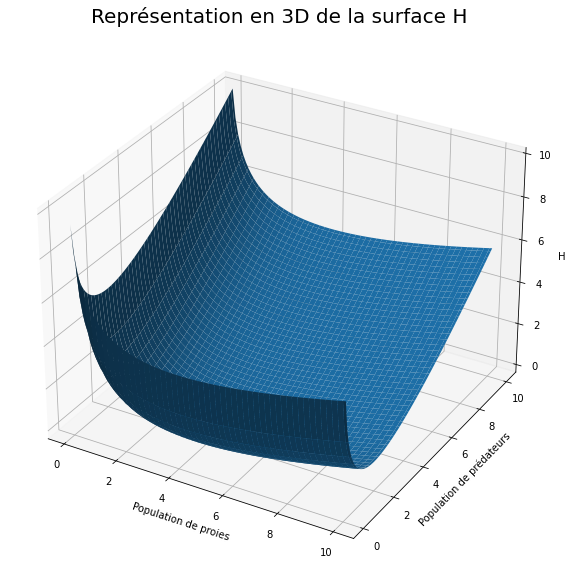

In [10]:
x=np.linspace(0.1,10,100)
y=np.linspace(0.1,10,100)
X,Y=np.meshgrid(x,y)
Z=delta*X-gamma*np.log(X)+beta*Y-alpha*np.log(Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)
plt.title("Représentation en 3D de la surface H", size=20)
ax.set_zlabel("H")
plt.xlabel("Population de proies")
plt.ylabel("Population de prédateurs")
plt.show()

En lien avec le champ des vecteurs qu'on avait obtenu à la question 2, on en déduit que partant d'un point initial, la solution associée va rester sur la ligne de niveau de $H$ où elle a été initialisée et va avoir une trajectoire périodique au cours du temps en "tournant en rond" autour du deuxième point d'équilibre.

De plus, on en déduit que le deuxième point d'équilibre $\bar{x}$ est stable puisque quitte à choisir un point d'initialisation suffisamment proche de $\bar{x}$, la solution associée va tourner autour de $\bar{x}$ et restera donc aussi proche que l'on souhaite de ce point d'équilibre.


## 
## Question 6

On implémente la fonction python de l'algorithme du schéma d'Euler explicite :

In [11]:
def solve_euler_explicit(f,x0,dt,t0,tf):
    n = math.floor((tf-t0)/dt)
    tabx,tabt = np.array([x0]*(n+1)),np.array([t0+i*dt for i in range(n+1)])
    for i in range(1,n+1):
        tabx[i] = tabx[i-1] + dt * f(tabt[i-1],tabx[i-1])
    return tabx,tabt

On la teste avec l'équation différentielle $\dot x = -0,5 \, x$ initialisée en $(0 \, ; 1)$, et dont la solution connue est la fonction $h : t \in \mathbb{R} \longmapsto \exp(-0,5t)$.

In [12]:
def h(t,x):
    return -0.5*x

In [13]:
def sol_dt(h,dt):
    return solve_euler_explicit(h,np.array([1.0]),dt,0.0,10.0)

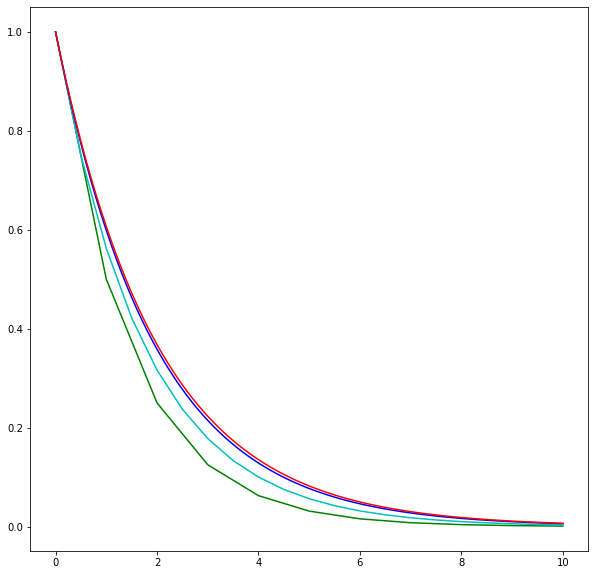

In [14]:
X0,T0 = sol_dt(h,1.0)
X1,T1 = sol_dt(h,0.5)
X2,T2 = sol_dt(h,0.1)
plt.plot(T0,X0, color='g')
# La courbe verte est celle obtenue avec le schéma d'Euler explicite pour dt = 1,0
plt.plot(T1,X1, color='c')
# La courbe cyan est celle obtenue avec le schéma d'Euler explicite pour dt = 0,5
plt.plot(T2,X2, color='b')
# La courbe bleue foncée est celle obtenue avec le schéma d'Euler explicite pour dt = 0,1
plt.plot(T2,np.exp(-0.5*T2), color='r')
# La courbe rouge est celle obtenue en traçant directement la solution mathématique
plt.show()

On voit donc dès-à-présent la convergence du schéma lorsque l'on fait tendre $\mathrm{d}t$ vers $0$.

Ensuite, d'après le cours, pour un ordre de convergence $p$, on doit avoir l'inégalité suivante vérifiée pour $p$ mais pas $p+1$ :

$\max_{0 \leqslant j \leqslant n} |\eta(j)| \leqslant c_s \, (\mathrm{d}t)^q$

Pour le déterminer, on trace donc $\log \left( \max_{0 \leqslant j \leqslant n} |\eta(j)| \right)$ en fonction de $\log \left( (\mathrm{d}t) \right)$ et le coefficient directeur de la droite obtenue indiquera l'ordre de convergence cherché.


In [15]:
def neta(dt):
    X,T = sol_dt(h,dt)
    J = np.linspace(0,len(T)-1,len(T),dtype=int)
    return max(np.exp(-0.5*(T[J]+dt))-np.exp(-0.5*T[J])-dt*h(T[J],np.exp(-0.5*T[J])))/dt

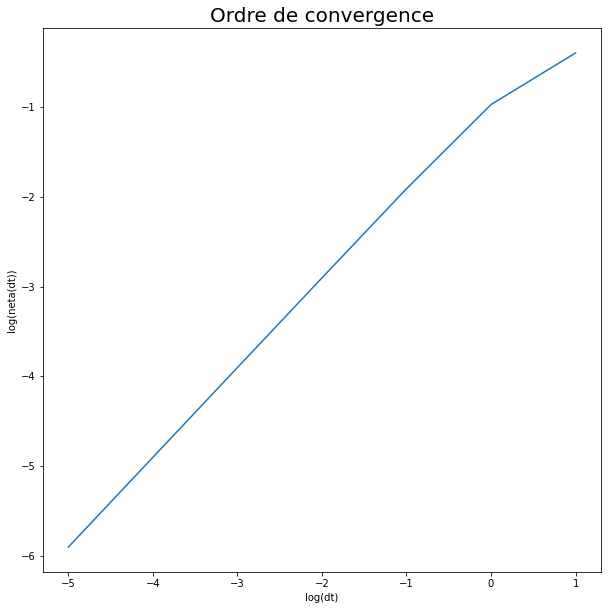

In [16]:
def ordre_de_convergence(f):
    Y=[]
    X=[]
    for i in range(-5,2):
        X.append(i)
        Y.append(math.log10(neta(10**(i))))
    return X,Y

X,Y = ordre_de_convergence(h)
plt.plot(X,Y)
plt.title("Ordre de convergence",size=20)
plt.ylabel("log(neta(dt))")
plt.xlabel("log(dt)")
plt.show()

On voit donc graphiquement que l'ordre de convergence est de $1$.

## 
## Question 7

On trace la solution des équations différentielles de  Lotka-Volterra initialisée avec $10$ proies et $2$ prédateurs obtenue à l'aide du schéma d'Euler explicite pour $\mathrm{d}t = 0,01$.

In [17]:
def f1(t,X):
    x1,x2=X[0],X[1]
    x1_prime = alpha*x1-beta*x1*x2
    x2_prime = -gamma*x2+delta*x1*x2
    return np.array([x1_prime,x2_prime])

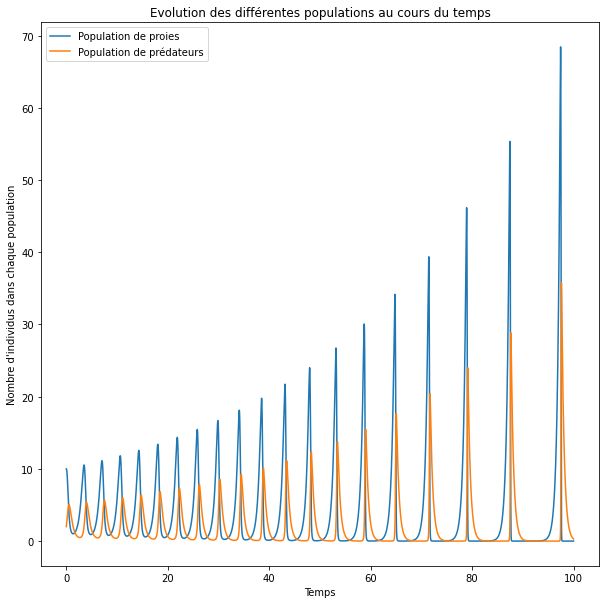

In [18]:
X,T = solve_euler_explicit(f1,np.array([10.0,2.0]),0.01,0.0,100.0)
X = X.T
plt.plot(T,X[0])
plt.plot(T,X[1])
plt.title("Evolution des différentes populations au cours du temps")
plt.ylabel("Nombre d'individus dans chaque population")
plt.xlabel("Temps")
plt.legend(["Population de proies","Population de prédateurs"])
plt.show()

Il semble a priori étrange qu'on ait un accroissement exponentiel des populations de proies et de prédateurs, ce que confirme le tracé de $H$ qui diverge au lieu de rester constatnt.

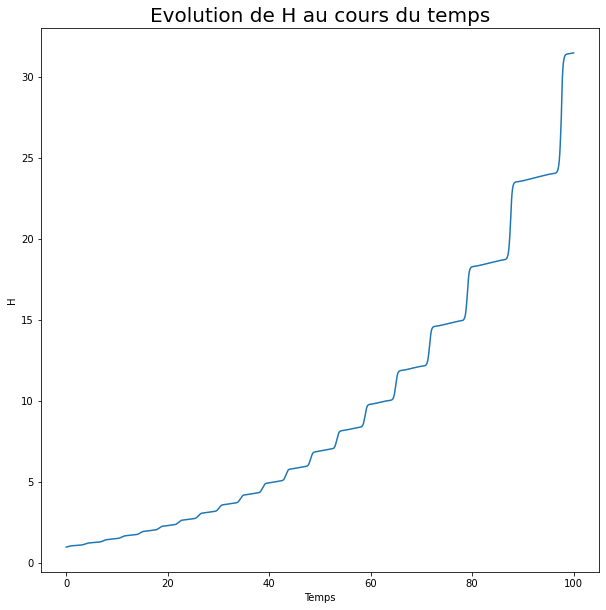

In [19]:
HZ = np.vectorize(H)(X[0],X[1])
plt.plot(T,HZ)
plt.title("Evolution de H au cours du temps", size=20)
plt.ylabel("H")
plt.xlabel("Temps")
plt.show()

## 
## Question 8

On implémente la fonction python de l'algorithme du schéma d'Euler implicite :

In [20]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax=100):
    n = math.floor((tf-t0)/dt)
    x,t = np.array([x0]*(n+1)),np.array([t0+i*dt for i in range(n+1)])
    for i in range(1,n+1):
        itera = 0
        cond = False
        xki0 = x[i-1] + dt * f(t[i-1],x[i-1])
        xki=xki0
        while (not cond) and itera<itermax :
            xkj = x[i-1] + dt * f(t[i],xki) 
            if np.linalg.norm((xki-xkj)/xki0) <10**(-5):
                cond = True
            xki=xkj
            itera+=1
        x[i]=xki

    return x,t

On la teste avec la même équation différentielle connue que précédemment :

In [21]:
def sol_dt2(h,dt):
    return solve_euler_implicit(h,np.array([1.0]),dt,0.0,10.0)

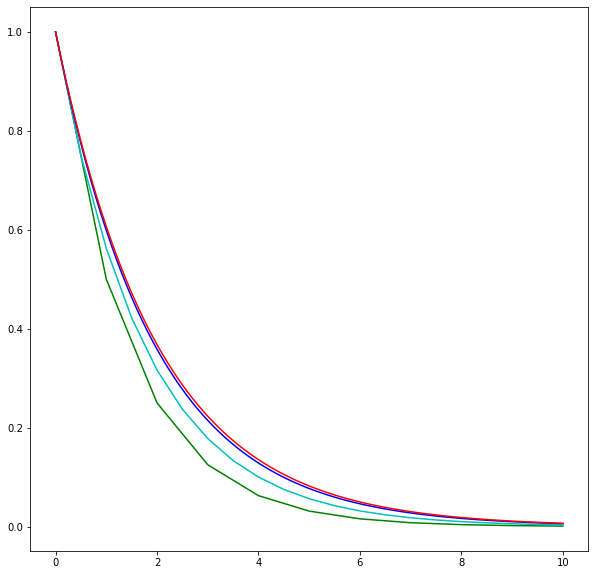

In [22]:
X0,T0 = sol_dt(h,1.0)
X1,T1 = sol_dt(h,0.5)
X2,T2 = sol_dt(h,0.1)
plt.plot(T0,X0, color='g')
# La courbe verte est celle obtenue avec le schéma d'Euler explicite pour dt = 1,0
plt.plot(T1,X1, color='c')
# La courbe cyan est celle obtenue avec le schéma d'Euler explicite pour dt = 0,5
plt.plot(T2,X2, color='b')
# La courbe bleue foncée est celle obtenue avec le schéma d'Euler explicite pour dt = 0,1
plt.plot(T2,np.exp(-0.5*T2), color='r')
# La courbe rouge est celle obtenue en traçant directement la solution mathématique
plt.show()

Comme précédemment, on a convergence du schéma lorsque $\mathrm{d}t$ tend vers $0$.

Et, lorsqu'on applique ce schéma aux équations de Lokta-Volterra avec une initialisation par $10$ proies et $2$ prédateurs, et avec $\mathrm{d}t=0,01$, on obtient :

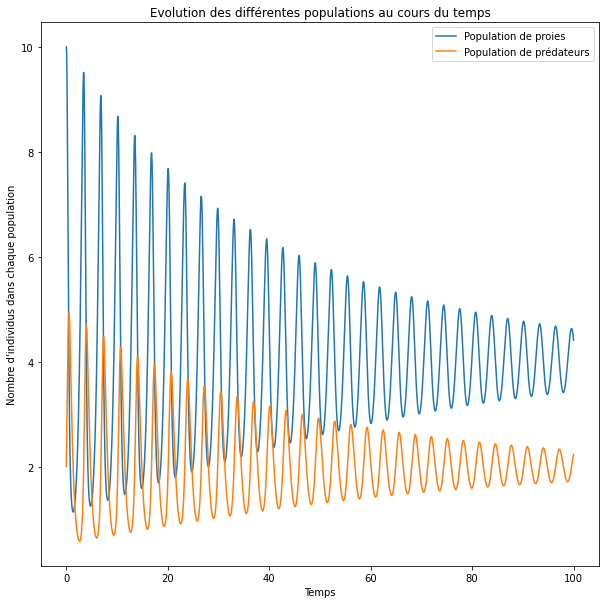

In [23]:
X1,T = solve_euler_implicit(f1,np.array([10.0,2.0]),0.01,0.0,100.0,100)
T = np.array(T)
X1 = np.array(X1).T
plt.plot(T,X1[0])
plt.plot(T,X1[1])
plt.title("Evolution des différentes populations au cours du temps")
plt.ylabel("Nombre d'individus dans chaque population")
plt.xlabel("Temps")
plt.legend(["Population de proies","Population de prédateurs"])
plt.show()

On observe cette fois-ci une convergence des effectifs des populations vers le point d'équilibre $\bar{x}$, ce qui traduit encore une fois une non-conservation de $H$ comme le confirme le graphe ci-dessous :

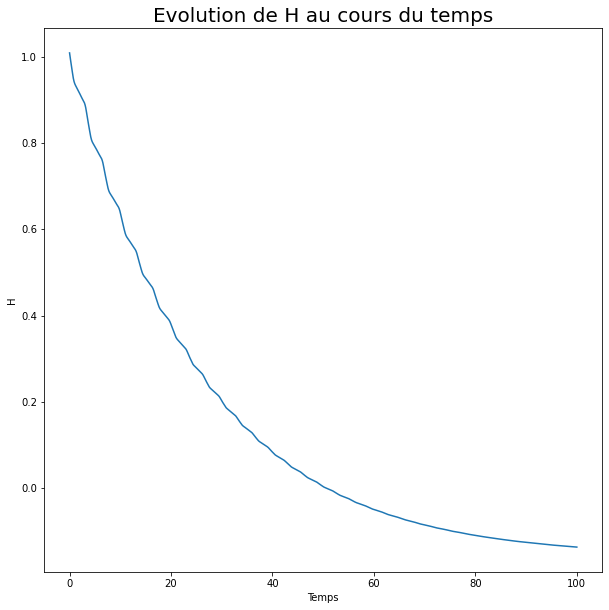

In [24]:
HZ = np.vectorize(H)(X1[0],X1[1])
plt.plot(T,HZ)
plt.title("Evolution de H au cours du temps", size=20)
plt.ylabel("H")
plt.xlabel("Temps")
plt.show()

## 
## Question 9

Le long des solutions des équations de Lokta-Volterra initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$, on a vu précédemment que $H$ est constant et donc qu'en particulier, il est constant égal à $H(X(0))$. Il en découle qu'une telle solution vérifie le nouveau système d'équations différentielles puisqu'alors le terme ajouté est nul et qu'on retombe sur les équations de Lokta-Volterra qui sont elles vérifiées par définition de la solution.

Donc, pour des initialisations dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ les solutions des équations de Lokta-Volterra sont solutions du nouveau système d'équations différentielles.

Or, pour $u$ continûement différentiable, on peut définir une nouvelle fonction $f_2$ continûement différentiable par rapport à $x$ sur le modèle de $f$ de la question 3, et avec Cauchy-Lipschitz, on en déduit de même que pour chaque initialisation, il n'existe qu'une unique solution maximale de ce système d'équations différentielles. 

Or, les solutions de Lokta-Volterra convenant déjà et étant maximales puisque définies sur $\mathbb{R}$, on a, par unicité, que ces solutions sont les uniques solutions du nouveau système.

Ainsi, pour chaque initialisation dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$, il n'existe qu'une unique solution de ce nouveau système, et c'est celle de Lokta-Volterra correspondant à ladite initialisation.

## 
## Question 10

Soit $H_0 \in \mathbb{R}$.

On considère une solution maximale du nouveau système d'équations différentielles qu'on note $X$.

Calculons alors la dérivée de $H-H_0$ par rapport au temps le long de la solution $X$ :

$\dfrac{\mathrm{d} \left(H(X(t))-H_0 \right)}{\mathrm{d} t} = \dfrac{\mathrm{d} \left(H(X(t)) \right)}{\mathrm{d} t} = \delta \dot x_1 (t) - \gamma \dfrac{\dot x_1 (t)}{x_1(t)} + \beta \dot x_2 (t) - \alpha \dfrac{\dot x_2 (t)}{x_2(t)} $

Or, $X$ étant solution du nouveau système d'équations différentielles, il vient, en utilisant également le résultat de la question 4 :

$\dfrac{\mathrm{d} \left(H(X(t))-H_0 \right)}{\mathrm{d} t} = 0 + \dfrac{-u_1(X(t))(H(X(t))-H_0) \times (-\gamma)}{x_1(t)} - \alpha \times \dfrac{u_2(X(t))(H(X(t))-H_0)}{x_2(t)} -\delta u_1(X(t)) (H(X(t))-H_0) - \beta u_2(X(t)) (H(X(t))-H_0)$

$\phantom{-----.---}= (H(X(t))-H_0) \left[-\delta u_1(X(t)) + \dfrac{\gamma u_1(X(t))}{x_1(t)} -\beta u_2(X(t)) +\dfrac{\alpha u_2(X(t))}{x_2(t)} \right]$

$ \phantom{-----.---}= (H(X(t))-H_0) \left[ u_1(X(t)) \left(\dfrac{\gamma}{x_1(t)}-\delta \right) + u_2(X(t)) \left(\dfrac{\alpha}{x_2(t)}-\beta \right) \right]$

Or, on calcule :

$\nabla H(X(t)) = \left[\delta - \dfrac{\gamma}{x_1(t)} \quad \beta -\dfrac{\alpha}{x_2(t)} \right] $

D'où :

$||\nabla H(X(t))||^2 = \left[\left(\delta - \dfrac{\gamma}{x_1(t)} \right)^2 + \left(\beta -\dfrac{\alpha}{x_2(t)} \right)^2 \right] $

Il suffit alors de poser :

$u \left(\begin{bmatrix} x_{1}(t) \\ x_{2}(t) \end{bmatrix}\right) = -k \, \left( \dfrac{\gamma}{x_1(t)}-\delta \, , \dfrac{\alpha}{x_2(t)}-\beta \right)$

On a alors bien $u$ continûement différentiable et donnant le résultat demandé.


Tant que la solution se trouve à une distance strictement positive de $\bar{x}$, on calcule que $||\nabla H(X(t))||^2>0$. 

En ayant choisi $u$ de manière à avoir le long des solutions :

$\dfrac{\mathrm{d} \left(H(X(t))-H_0 \right)}{\mathrm{d} t} = -k \, ||\nabla H(X(t))||^2 (H(X(t))-H_0)$

On en déduit qu'à chaque instant $t$, $H(X(t))-H_0$ est solution d'une équation différentielle ayant pour solution une exponentielle strictement décroissante à la vitesse $k \, ||\nabla H(X(t))||^2>0$, et que donc le $H(X(t))$ converge exponentiellement vers $H_0$.

## 
## Question 11

On implémente une nouvelle fonction $f_2$ correspondant au nouveau système d'équations différentielles et on résout alors ce système avec l'un ou l'autre schéma.

Ci-dessous, voici la résolution du nouveau système à partir de la solution initiale $10$ proies et $2$ prédateurs, avec un pas de temps $\mathrm{d}t = 0,01$ pour le schéma d'Euler implicite :

In [25]:
X0 = np.array([10.0 , 2.0])

In [26]:
def fctH(X):
    x1,x2=X[0],X[1]
    return delta*x1-gamma*math.log(x1)+beta*x2-alpha*math.log(x2)

In [27]:
def f1bis(t,X):
    x1,x2=X[0],X[1]
    u1,u2 = fctu(X)
    x1_prime = alpha*x1-beta*x1*x2 - u1*(fctH(X)-fctH(X0))
    x2_prime = -gamma*x2+delta*x1*x2 - u2*(fctH(X)-fctH(X0))
    return np.array([x1_prime,x2_prime])

In [28]:
k=10
def fctu(X):
    x1,x2=X[0],X[1]
    u1 = -k * (gamma/x1 - delta)
    u2 = -k * (alpha/x2 - beta)
    return np.array([u1 , u2])

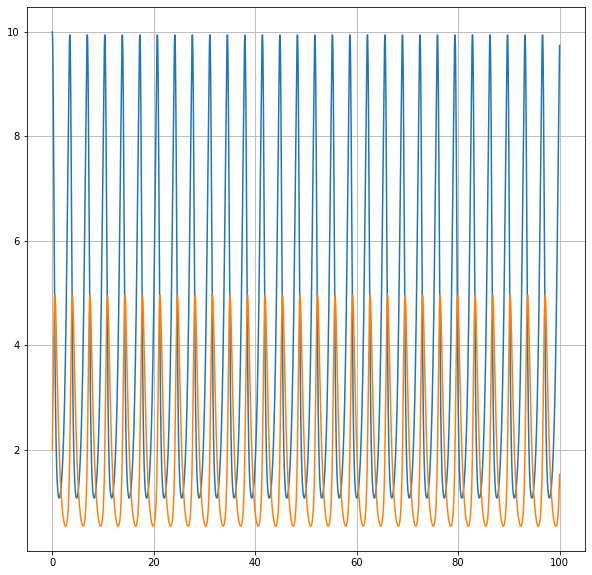

In [29]:
X2,T = solve_euler_implicit(f1bis,X0,0.01,0.0,100.0,100)
X2 = X2.T
plt.plot(T,X2[0])
plt.plot(T,X2[1])
plt.grid(True)
plt.show()

La résultat semble bien régulier, et le graphe suivant nous montre qu'à quelques oscillations près, $H$ est constant égal à la valeur initiale, ce qui est ce que nous cherchions.

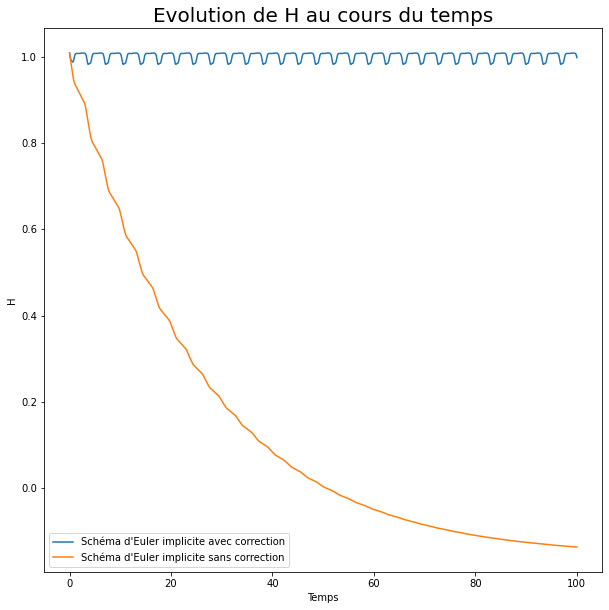

In [30]:
HZ2 = np.vectorize(H)(X2[0],X2[1])
plt.plot(T,HZ2)
HZ1 = np.vectorize(H)(X1[0],X1[1])
plt.plot(T,HZ1)
plt.title("Evolution de H au cours du temps", size=20)
plt.ylabel("H")
plt.xlabel("Temps")
plt.legend(["Schéma d'Euler implicite avec correction","Schéma d'Euler implicite sans correction" ])
plt.show()

Nous avons choisi ici la valeur $k=10$. Ayant traçé les graphes pour $k$ allant de $10^{-2}$ à $100$ par puissance de $10$ successive, on se rend compte de plusieurs éléments :

Tout d'abord, pour de petites valeurs de $k$, on obtient quasiment la même chose que pour les équations de Lokta-Volterra. La correction apparaît donc négligeable et ne remplit pas sa fonction.

Ensuite, pour $k$ se rapprochant de $1$, la correction commence à apparaître et on observe une stagnation de $H$ autour d'une valeur d'équilibre inférieure à $H_0$. La correction apportée augmentant à mesure que $H$ s'éloigne de $H_0$, elle finit par compenser la dérégulation apportée à chaque tour.

Puis, pour $k$ entre $1$ et $10$, la correction est suffisante pour compenser la dérégulation apportée à chaque tour et $H$ oscille autour de $H_0$ par valeurs inférieures - c'est ce qu'on observe au-dessus.

Enfin, pour $k$ plus grand que $10$, la correction devient trop importante et on observe des anomalies qui conduisent à une grande instabilité autour de $\bar{x}$. On peut imaginer que la correction conduit dans le système d'équation différentielle à rendre négligeable les termes venant des équations de Lokta-Volterra, et en particulier lorsque ces termes deviennent petits (aux maximums et minimums de populations). 